In [20]:
import awkward as ak
import matplotlib.pyplot as plt
import hist
import numpy as np
import vector
import os

import pylhe

In [21]:
import seaborn as sns
colors = sns.color_palette("colorblind", 8)

In [22]:
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

## General parameters

In [23]:
lumi = 13.3e3 #luminosity in inverse picobars

In [24]:
num_bins = 50
max_bins = 800

## Functions to read from event files and produce histograms

In [25]:
def read_sigma_nevents(dirname):
    filename = dirname + dirname.split('/')[-2]+'_tag_1_banner.txt'
    with open(filename,'r') as f:
        data = f.readlines()
    f.close()
    sigma = float(data[-4].split(' ')[-1])
    nevents = float(data[-5].split(' ')[-1])
    return sigma, nevents

In [38]:
def produce_histogram(dirname, scale):
    
    pylhe.register_awkward()
    
    filename = dirname + 'unweighted_events.lhe'
    arr = pylhe.to_awkward(pylhe.read_lhe_with_attributes(filename))
    
    sigma, nevents = read_sigma_nevents(dirname)
    ww = sigma*lumi/nevents
    
    leading_pt = np.zeros(int(nevents))
    for i in range(0,int(nevents),1):
        leading_pt[i] = max(arr.particles.vector[i,2].pt, arr.particles.vector[i,3].pt)
                           
    axis0 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
    storage = hist.storage.Weight()
    hist0 = hist.Hist(axis0, storage=storage)
    hist0.fill(leading_pt, weight=ww*scale)
    
    return hist0

## Set directories

In [39]:
# SM pp->ttbar
dir_ttbar = os.path.expanduser('~/Documents/MadGraph/pptt/Events/run_01/')
# pp -> ttbar+ax, c_aPhi = 1
dir_ttbarax1 = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_01/')
# pp -> ttbar+ax, c_aPhi = 10
dir_ttbarax10 = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_02/')
# pp -> ttbar+ax, c_aPhi = 1000
dir_ttbarax1000 = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_03/')
# pp -> ttbar+ax, c_aPhi = 0.1
dir_ttbarax01 = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_05/')
# pp -> ttbar+ax, c_aPhi = 100
dir_ttbarax100 = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_06/')

## Generate histogram

In [40]:
hist0 = produce_histogram(dir_ttbar, 1) # SM
hist1 = produce_histogram(dir_ttbarax01, 1e5) # c = 0.1
hist2 = produce_histogram(dir_ttbarax1, 1e4) # c = 1
hist3 = produce_histogram(dir_ttbarax10, 1e2) # c = 10
hist4 = produce_histogram(dir_ttbarax100, 1e0) # c = 100
hist5 = produce_histogram(dir_ttbarax1000, 1e-4) # c = 1000

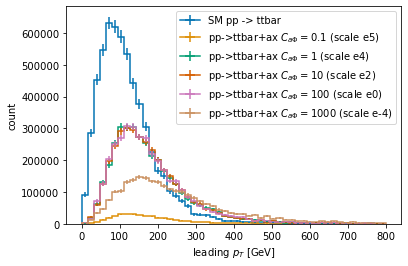

In [41]:
artists0 = hist0.plot1d(label='SM pp -> ttbar', color = colors[0]);
artists1 = hist1.plot1d(label='pp->ttbar+ax $C_{a \Phi} = 0.1$ (scale e5)', color = colors[1]);
artists2 = hist2.plot1d(label='pp->ttbar+ax $C_{a \Phi} = 1$ (scale e4)', color = colors[2]);
artists3 = hist3.plot1d(label='pp->ttbar+ax $C_{a \Phi} = 10$ (scale e2)', color = colors[3]);
artists4 = hist4.plot1d(label='pp->ttbar+ax $C_{a \Phi} = 100$ (scale e0)', color = colors[4]);
artists5 = hist5.plot1d(label='pp->ttbar+ax $C_{a \Phi} = 1000$ (scale e-4)', color = colors[5]);
ax = artists0[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel("leading $p_T$ [GeV]");
ax.set_ylabel("count");
ax.legend()